In [1]:
from assignment_analytical import *
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [4]:
μ = 1.0
ρ_values = np.linspace(0,1,101)[1:-1]
λ_values = ρ_values * μ
server_counts = np.array([1,2,4])
analytical_waiting_times = np.array([MM1_waiting_time(λ, μ) for λ in λ_values])
analytical_waiting_times_MMn = np.array([MMn_mean_waiting_time(λ, μ, 1) for λ in λ_values])

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]


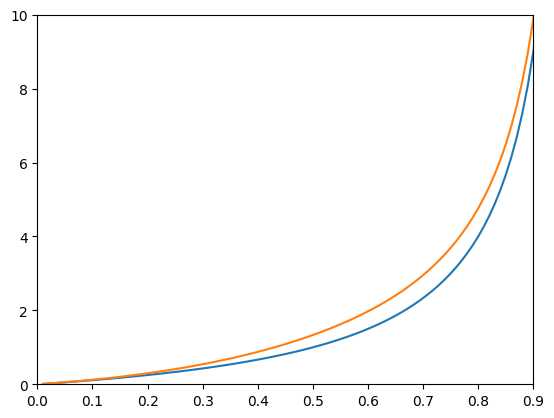

In [17]:
plt.plot(ρ_values, analytical_waiting_times)
# MM1_waiting_time
plt.plot(ρ_values, analytical_waiting_times_MMn)
# MMn_mean_waiting_time(λ, μ, n = 1)
plt.xlim(0, 0.9)
plt.ylim(0, 10)
plt.show()

In [6]:
server_counts = np.array([1,2,4])
mean_waiting_times = [[MMn_mean_waiting_time(n*λ, μ, n) for λ in λ_values] for n in server_counts]

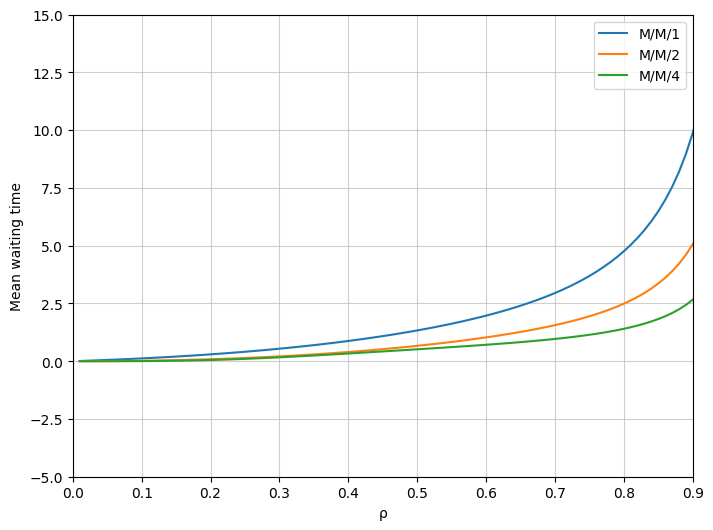

In [13]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for i,wtimes in enumerate(mean_waiting_times):
    ax.plot(ρ_values, wtimes, label = f"M/M/{server_counts[i]}")
ax.set_xlabel("ρ")
ax.set_ylabel("Mean waiting time")
ax.grid(alpha = 0.6)
ax.legend()
ax.set_xlim(0, 0.9)
ax.set_ylim(-5, 15)
plt.show()

In [14]:
MM1_waiting_time(0.9, 1)

9.000000000000002

In [16]:
MMn_mean_waiting_time(0.9, 1, 1)

9.890109890109892